Quinn O'Connor

 - Jack Joiner
 - Ratul Pradhan
 - Reid Norton


DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [30]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [32]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_train = model_1.predict(X_train)
y_pred_test = model_1.predict(X_test)
y_pred = model_1.predict(X)

R2_train = model_1.score(X_train, y_train)
R2_test = model_1.score(X_test, y_test) 

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)  

print(R2_test)
print(MSE_test)
#Using test data because it provides unbiased eval of model performance on unseen data


0.99285183178066
85.50162291627659


In [47]:
print_model(bias, coef, column_names, "True Model")

True Model:
 y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5


#### Your written answers here

What are your model parameters?
 - y = -6.25 + 21.88*x1 + 21.21*x2 + 96.62*x3 + 6.93*x4 + 48.32*x5

What were your MSE and R^2?
 - MSE = 85.5 and R^2 = .99




## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [6]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


In [7]:
reg2_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-0.019007,-0.081434,-0.014396,0.005781,0.041543,-0.030161,0.001037,-0.024288,-0.004252,-0.020702,-25.236430
1,0.008066,0.007271,-0.012255,-0.062581,0.032108,0.030362,-0.005309,-0.017288,0.012837,0.004792,-12.537903
2,0.032845,-0.063578,-0.009525,0.020147,-0.019702,-0.053699,-0.011607,-0.039859,-0.024391,-0.027195,-22.264183
3,-0.009999,-0.125704,0.015806,-0.008291,-0.057393,-0.063838,-0.005211,0.097825,-0.033332,-0.016052,-37.087455
4,-0.004742,0.057318,0.009264,-0.047371,0.032000,-0.038891,-0.037838,-0.076428,0.050613,-0.009998,-14.858578


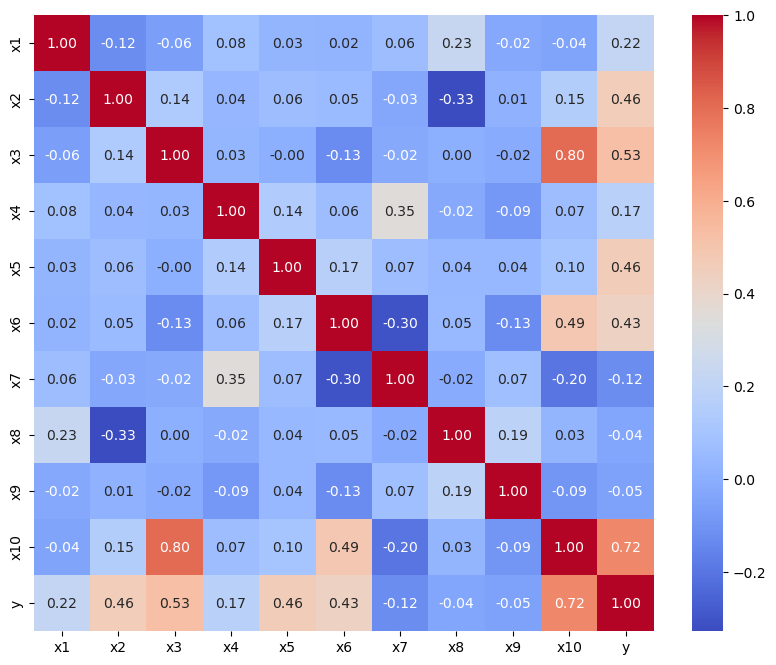

In [25]:

corr_matrix = reg2_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [62]:
import sklearn.linear_model as sklm

candidate_idx = np.array([1, 2, 3,5,6,7,10]) - 1 # Adjusted to match the correct indices
Z = reg2_df.iloc[:, candidate_idx].values
Z_names = [reg2_df.columns[i] for i in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, reg2_df['y'], test_size=0.3, random_state=15)

model_LR = sklm.LinearRegression()
model_LR.fit(Z_train, y_train)

y_pred_train = model_LR.predict(Z_train)
y_pred_test = model_LR.predict(Z_test)
y_pred = model_LR.predict(Z)

R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

print(R2_test)
print(R2_train)
print(MSE_test) 
print(MSE_train)


0.8179627710145256
0.8798831970697841
8.954811797220406
9.941193627677123


#### Your written answers here

What are your model parameters?
 - 1,2,3,5,6,7,10

Which features (x1, x2...) were significant? Which were co-linear?
 - x3 and x10 were significant
 - x6 was co-linear with x10
 - x3 was co-linear with x10
 
What were your MSE and R^2?
 - r^2 = .82
 - MSE = 8.95



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [8]:
housing_df = pd.read_csv('kc_house_data.csv')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


In [9]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

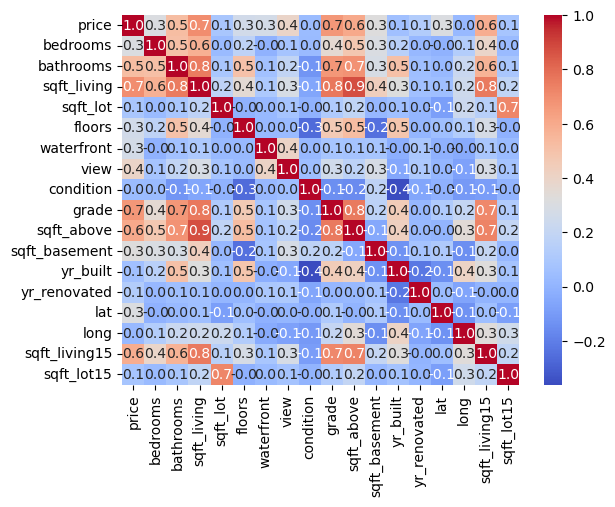

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk

housing_df = pd.read_csv('kc_house_data.csv')
housing_df.drop(columns = ['id', 'date','zipcode'], inplace = True)

correlation_matrix = housing_df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

In [65]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']] ##Double brackets to keep it as a dataframe, not series
y = housing_df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)


LinearRegression()

In [67]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

y = housing_df['price']
X = housing_df.drop(columns=['price'])


# Missing steps for you to fill in
model_lasso = Lasso(alpha = 0.5)


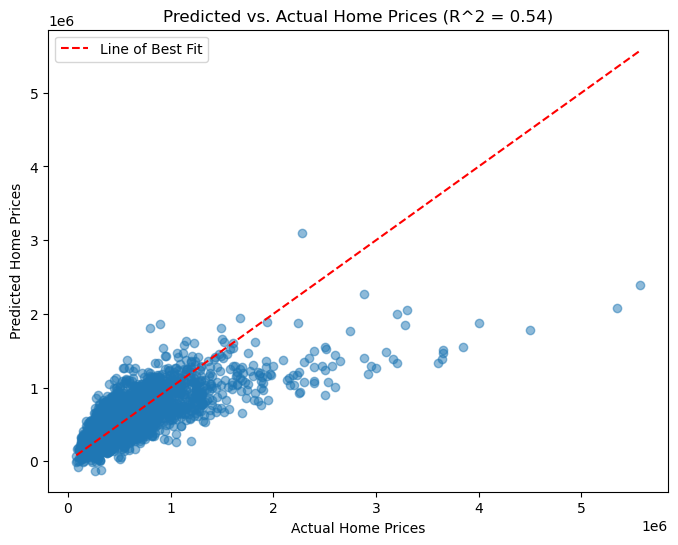

In [83]:

from sklearn.preprocessing import StandardScaler

features = ["sqft_living", "bathrooms", "grade"]
X = df[features]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Line of Best Fit")
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title(f"Predicted vs. Actual Home Prices (R^2 = {r2:.2f})")
plt.legend()
plt.show()


In [69]:
r2

0.542053245287136

#### Your written answers here
Which features are you using and why?
 
 - I used sq footage, bathrooms, and grade as my features. I used these as, based off of the heat map from class, there was meaningful correlation with the price of homes.


### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [74]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

housing_df = pd.read_csv('kc_house_data.csv')

In [ ]:

X = housing_df.drop(columns=['price', 'date', 'zipcode'])
y = housing_df['price']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(feature_names)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [77]:
X = housing_df.drop(columns=['price'])

feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

alpha = 50
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 score with alpha={alpha}: {r2_ridge}")


R^2 score with alpha=50: -0.00111902511682338


In [90]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing_df.drop(columns=['price', 'date', 'zipcode'])
y = housing_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
alpha = 10000
r2_ridge = 0

while r2_ridge <= 0.65:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    alpha += 1000

print(r2_ridge)

0.656015332918904


In [94]:
coefficients = ridge_model.coef_
three_biggest = np.argsort(np.abs(coefficients))[-3:]
top_3_features = feature_names[three_biggest]

print("Top 3 features with the largest coefficients:")
for feature, coef in zip(top_3_features, coefficients[top_3_indices]):
    print(f"{feature}: {coef}")

Top 3 features with the largest coefficients:
yr_renovated: 55987.99587848274
bathrooms: 58439.74187048654
condition: 66792.25607612336


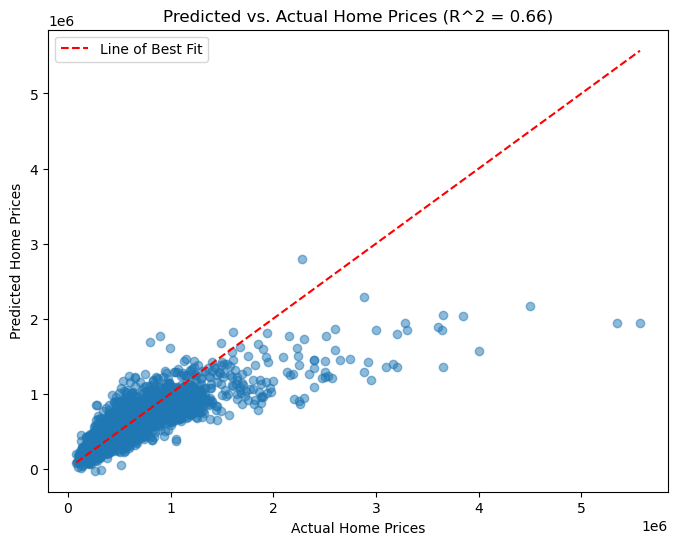

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Line of Best Fit")
plt.xlabel("Actual Home Prices")
plt.ylabel("Predicted Home Prices")
plt.title(f"Predicted vs. Actual Home Prices (R^2 = {r2_ridge:.2f})")
plt.legend()
plt.show()

### Your written answers here
Which regression did you use?
 - Ridge Regression


Does your regularized model look better than your MLR? How so?
 - Slightly, as there seemed to be less outliers

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [101]:
# Separate the homes into two groups based on price
below_one_million = housing_df[housing_df['price'] < 1000000]
above_one_million = housing_df[housing_df['price'] >= 1000000]

print(f"# of Homes below 1 Million$ {below_one_million.shape[0]}")
print(f"# of Homes equal to or above 1 Million$: {above_one_million.shape[0]}")

# of Homes below 1 Million$ 20121
# of Homes equal to or above 1 Million$: 1492


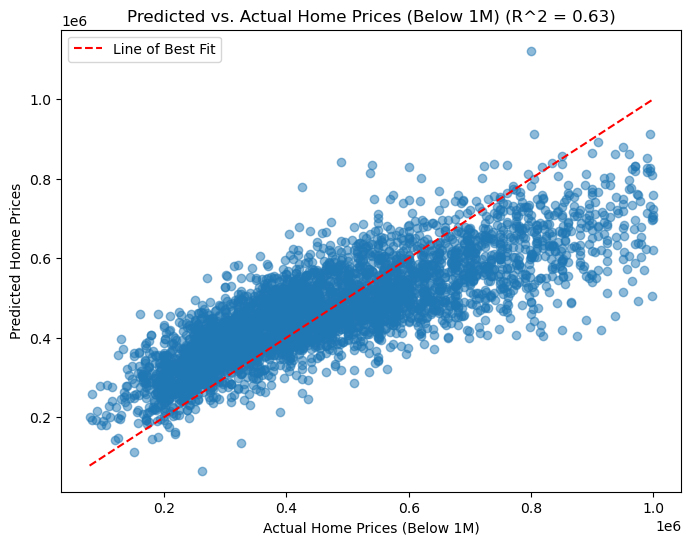

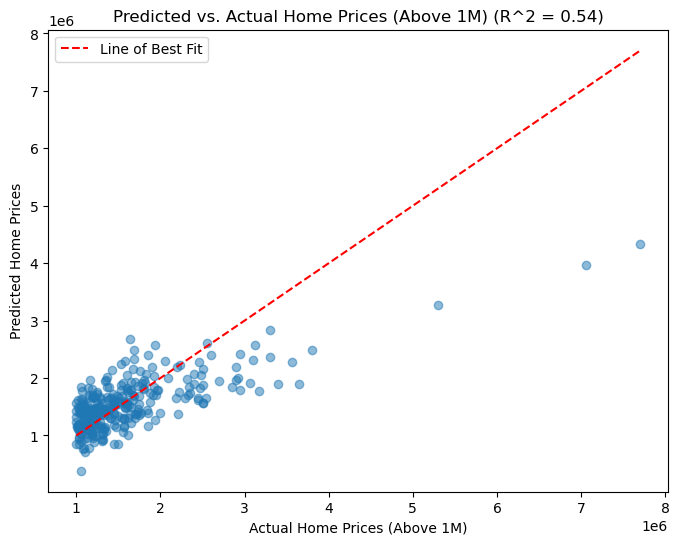

In [127]:
# Below 1 mil
X_below = below_one_million.drop(columns=['price', 'date', 'zipcode'])
y_below = below_one_million['price']

X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, test_size=0.2, random_state=42)

scaler_below = StandardScaler()
X_train_below_scaled = scaler_below.fit_transform(X_train_below)
X_test_below_scaled = scaler_below.transform(X_test_below)

ridge_model_below = Ridge(alpha=10000)
ridge_model_below.fit(X_train_below_scaled, y_train_below)

y_pred_below = ridge_model_below.predict(X_test_below_scaled)
r2_below = r2_score(y_test_below, y_pred_below)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_below, y_pred_below, alpha=0.5)
plt.plot([min(y_test_below), max(y_test_below)], [min(y_test_below), max(y_test_below)], color='red', linestyle='dashed', label="Line of Best Fit")
plt.xlabel("Actual Home Prices (Below 1M)")
plt.ylabel("Predicted Home Prices")
plt.title(f"Predicted vs. Actual Home Prices (Below 1M) (R^2 = {r2_below:.2f})")
plt.legend()
plt.show()

# > 1 mil
X_above = above_one_million.drop(columns=['price', 'date', 'zipcode'])
y_above = above_one_million['price']

X_train_above, X_test_above, y_train_above, y_test_above = train_test_split(X_above, y_above, test_size=0.2, random_state=42)

scaler_above = StandardScaler()
X_train_above_scaled = scaler_above.fit_transform(X_train_above)
X_test_above_scaled = scaler_above.transform(X_test_above)

ridge_model_above = Ridge(alpha=100)
ridge_model_above.fit(X_train_above_scaled, y_train_above)

y_pred_above = ridge_model_above.predict(X_test_above_scaled)
r2_above = r2_score(y_test_above, y_pred_above)

plt.figure(figsize=(8, 6))
plt.scatter(y_test_above, y_pred_above, alpha=0.5)
plt.plot([min(y_test_above), max(y_test_above)], [min(y_test_above), max(y_test_above)], color='red', linestyle='dashed', label="Line of Best Fit")
plt.xlabel("Actual Home Prices (Above 1M)")
plt.ylabel("Predicted Home Prices")
plt.title(f"Predicted vs. Actual Home Prices (Above 1M) (R^2 = {r2_above:.2f})")
plt.legend()
plt.show()

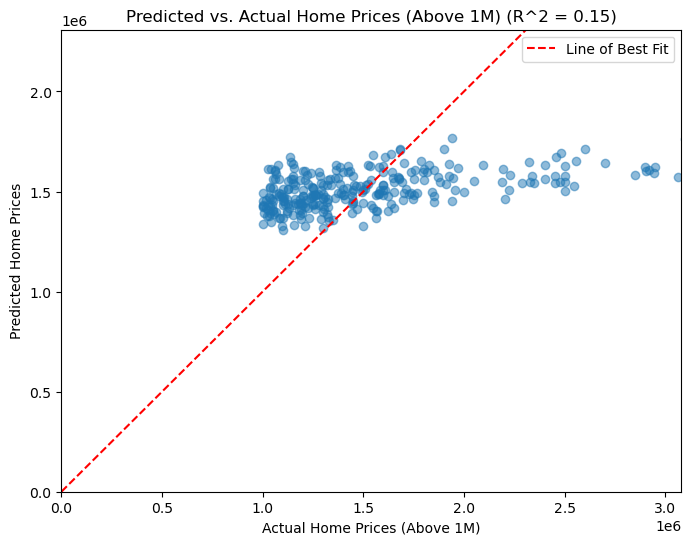

In [123]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_above, y_pred_above, alpha=0.5)
plt.plot([0, max(y_test_above)], [0, max(y_test_above)], color='red', linestyle='dashed', label="Line of Best Fit")
plt.xlabel("Actual Home Prices (Above 1M)")
plt.ylabel("Predicted Home Prices")
plt.title(f"Predicted vs. Actual Home Prices (Above 1M) (R^2 = {r2_above:.2f})")
plt.legend()

plt.xlim([min(y_test_above) * 0, max(y_test_above) * .4])
plt.ylim([min(y_pred_above) * 0, max(y_pred_above) * 1.1])

plt.show()


In [103]:
print(r2_score)

<function r2_score at 0x1658a3060>


In [128]:
from sklearn.metrics import r2_score
#Below 1 mil
r2_below = r2_score(y_test_below, y_pred_below)
print(r2_below)
#Above 1 mil
r2_above = r2_score(y_test_above, y_pred_above)
print(r2_above)

0.6286378918379931
0.5376327351292922


 ### Your written answers here

 What are the $R^2$ for the two models?

  - r^2 below 1 million$: .63
  - r^2 above 1 million$: .54

 
